## Test case №2:

Given dataset: file, which contains Linkedin profile scrapes of individuals that were part of an outreach effort. The goal is to get people to purchase a ticket to an event and ultimately join the organization as a member.  Since the same method of profile scraping will be used in the future to identify the best leads, it's important that patterns that exist in the content of the profiles be identified.

The column 'Result' has one of six outcomes for each person:

- Purchased membership: The ideal outcome, bought an event ticket and a membership
- Purchased event: A positive outcome but not ideal
- Approved: They were approved to come to an event but did not purchase
- Sent personal f/u: Conversation was started but ended
- Out of sequence: Conversation was started but ended
- 2021 Member: Someone who was a previous member of the organization

In order to better focus outreach efforts in the future, we need to determine which characteristics show a higher probability of purchasing a membership and/or purchasing an event ticket.

Please provide an analysis that identifies what traits, characteristics, patterns, etc. can be used to indicate a higher probability of a positive/ideal outcome and please describe your methodology.

**Methodology**

We need to find characteristics, patterns etc. of those, who has purchased ticket to an event.
Which characteristics theoreticaly can affect on the result - education, number of subscribers, location, jobtitle, activity in linkedin (last sign in).

So, I will see common characteristics of all individuals from the dataset and compare them with characteristics of those who has purchased the membership or event.

**Course of research:**
1. Data pre-processing (checking null values, duplicates, data types)
2. Research (comparison of all individuals woth those who has purchased)
3. Conclusion

### Data pre-processing

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
try:
    df=pd.read_excel('/Linkedin Accounts That Purchased Memberships.xlsx')
except: 
    df=pd.read_excel('/Users/ekaterina/Documents/thumos_test/dataset/Linkedin Accounts That Purchased Memberships.xlsx')

df.head(3)

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,naf5DesFromDropContact,sirenFromDropContact,siretFromDropContact,siretAddressFromDropContact,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking of missimg rows and duplicates**

In [3]:
#check missimg rows and duplicates
print("Missing data in rows:")
df.isnull().sum()

Missing data in rows:


linkedinProfile                 0
Result                          0
Other                         157
email                         132
description                    70
                             ... 
vatFromDropContact            332
schoolDescription             284
nbEmployeesFromDropContact    336
Unnamed: 72                   348
Unnamed: 73                   286
Length: 74, dtype: int64

In [4]:
# check duplicated rows
print("Duplicated rows:")
df.duplicated().sum()
#duplicated profiles
df.duplicated(subset=['linkedinProfile']).sum()

Duplicated rows:


2

In [5]:
#lets see on duplicates
ids = df["linkedinProfile"]
#df where saved duplicates
df[ids.isin(ids[ids.duplicated()])].sort_values("linkedinProfile")
data_duplicated = df[ids.isin(ids[ids.duplicated()])].sort_values("linkedinProfile")
#lets see all duplicates
df.query('linkedinProfile in @data_duplicated')
display(data_duplicated)

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,naf5DesFromDropContact,sirenFromDropContact,siretFromDropContact,siretAddressFromDropContact,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73
33,https://www.linkedin.com/in/bill-cochrane-7495667,Out of Sequence,Hollis,NaN,NaN,President at Nalu Board Co.,"Lakewood, Ohio, United States",Bill,Cochrane,Bill Cochrane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,https://www.linkedin.com/in/bill-cochrane-7495667,Out of Sequence,Hollis,NaN,NaN,President at Nalu Board Co.,"Lakewood, Ohio, United States",Bill,Cochrane,Bill Cochrane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,https://www.linkedin.com/in/sniktasam,Out of Sequence,Hollis,sam@buildfoothold.com,Experienced leader and entrepreneur set on cre...,Co-Founder at Foothold,"Bozeman, Montana, United States",Sam,Atkins,Sam Atkins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,https://www.linkedin.com/in/sniktasam,Out of Sequence,Hollis,sam@buildfoothold.com,Experienced leader and entrepreneur set on cre...,Co-Founder at Foothold,"Bozeman, Montana, United States",Sam,Atkins,Sam Atkins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#deleting of duplicates
df = df.drop(columns=['linkedinProfile', 'headline'])
count_rows_start = df.shape[0]
print('Number of rows in dataset: ', '{0:,}'.format(count_rows_start).replace(',', ' '))
df = df.drop(index=[33, 45]).reset_index(drop=True)
count_rows_after = df.shape[0]
print('-' * 50)
print('Number of deleted rows: ', '{0:,}'.format(count_rows_start - count_rows_after).replace(',', ' '))
print('% of deleted rows: ', '{0:.2%}'.format((count_rows_start - count_rows_after)/count_rows_after))
print('-' * 50)
print('Number of rows after removing: ', '{0:,}'.format(count_rows_after).replace(',', ' '))

Number of rows in dataset:  348
--------------------------------------------------
Number of deleted rows:  2
% of deleted rows:  0.58%
--------------------------------------------------
Number of rows after removing:  346


**Convert column's names from upper to low case**

In [7]:
#Convert whole column names from upper to low case
df.columns = df.columns.str.lower()
df.head(2)

,result,other,email,description,location,firstname,lastname,fullname,subscribers,userid,...,naf5desfromdropcontact,sirenfromdropcontact,siretfromdropcontact,siretaddressfromdropcontact,siretzipfromdropcontact,vatfromdropcontact,schooldescription,nbemployeesfromdropcontact,unnamed: 72,unnamed: 73
0,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,1704.0,3172258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,1745.0,14910006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['result'].replace('5. Purchased Membership','purchased membership', inplace=True)
df['result'].replace('3. Approved','approved', inplace=True)
df['result'].replace('2. Sent Personal f/u','sent personal f/u', inplace=True)
df['result'].replace('4.Purchased Event','purchased event', inplace=True)

df['result'].unique()

array(['purchased membership', 'purchased event', 'approved',
       'Out of Sequence', 'sent personal f/u', '2021 Member'],
      dtype=object)

**Checking data type**

In [9]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   result                        346 non-null    object        
 1   other                         189 non-null    object        
 2   email                         215 non-null    object        
 3   description                   277 non-null    object        
 4   location                      346 non-null    object        
 5   firstname                     346 non-null    object        
 6   lastname                      346 non-null    object        
 7   fullname                      346 non-null    object        
 8   subscribers                   345 non-null    float64       
 9   userid                        287 non-null    float64       
 10  mutualconnectionstext         4 non-null      object        
 11  mailfromdropcontact           15

- There are a lot of null values in columns. But I will not fill them, as soon as some columns does not contain necessary information and it's impossible to fill with median() or mean() value information about company or school. So we can affect the result of the analysis. 
- All dataset should be cleaned from the information which is not needed for the analysis. As soon as we need to find the traits, characteristics, patterns, etc. of those who purchased the event or membership, we will look at company, university, location, number of subscribers, school, degree, gender and other specific characteristics. Characteristic like skills or mail information are not usefull for the analysis. Also there are columns with less than 50% of non null rows.  So, I will delete columns with uneccesary information and columns where non-null rows > 173.
- Information about job decription will stay in dataset, to see the portrait of the individual.
- userid will be deleted, because there are null values in this columns, instead of that will be used profileid

**Deleting of rows**

In [10]:
#delete columns 
df = df.drop(df.loc[:, 'phonenumberfromdropcontact':'baseurl'].columns, axis=1)
df = df.drop(df.loc[:, 'joblocation2':'unnamed: 73'].columns, axis=1)
df = df.drop(['firstname', 'lastname','mutualconnectionstext','mailfromdropcontact','userid','email'], axis=1)

In [11]:
#lets check final columns 
print(list(df))

['result', 'other', 'description', 'location', 'fullname', 'subscribers', 'company', 'companyurl', 'jobtitle', 'jobdescription', 'joblocation', 'jobdaterange', 'company2', 'companyurl2', 'jobtitle2', 'jobdescription2', 'jobdaterange2', 'school', 'schoolurl', 'schooldegree', 'schooldegreespec', 'schooldaterange', 'school2', 'schoolurl2', 'schooldegree2', 'schooldegreespec2', 'schooldaterange2', 'qualificationfromdropcontact', 'civilityfromdropcontact', 'profileid', 'timestamp']


### 2. Research and Analysis

**2.1 Number of subscribers. Here will be checked how many subscribers have those who purchased and what is average number of subscribers.**

In [12]:
#creating of dataset with subscribers on categories
sbs = df.groupby('result').agg({'subscribers' : 'median'}).sort_values(by='subscribers', ascending=False).reset_index()
display(sbs)

,result,subscribers
0,purchased membership,1724.5
1,2021 Member,1470.5
2,approved,1444.0
3,sent personal f/u,1175.0
4,purchased event,863.5
5,Out of Sequence,852.5


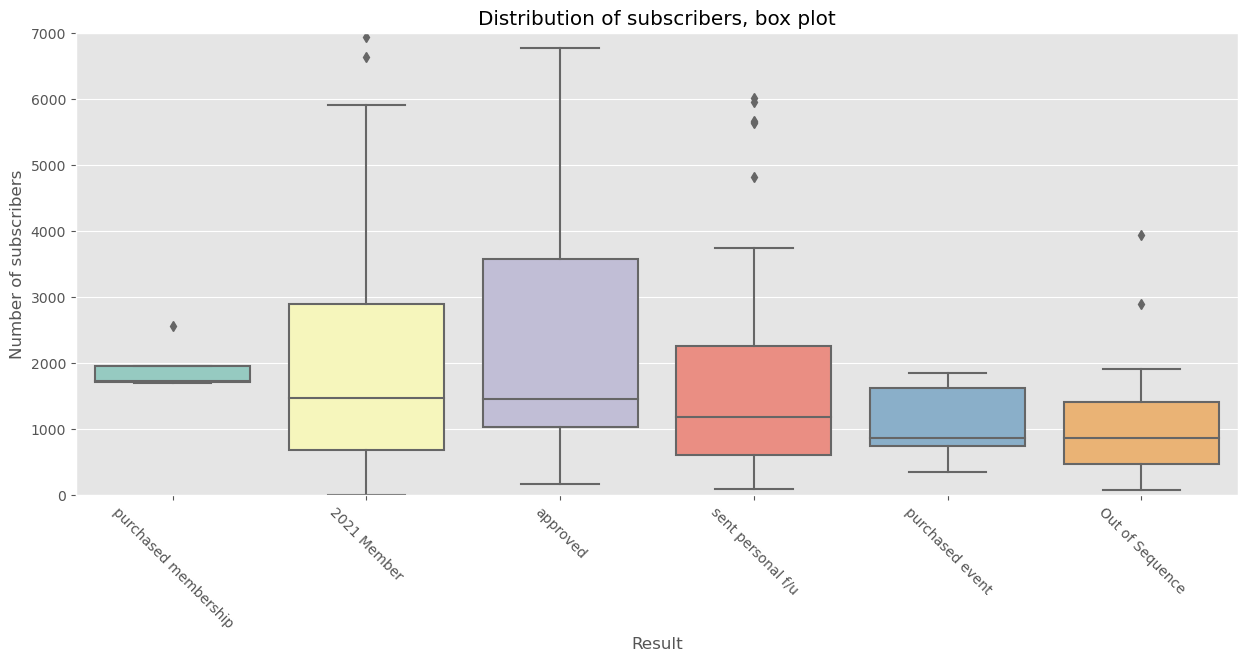

In [13]:
#boxplot of subscribers
plt.style.use('ggplot') # ggplot style
palette = sns.color_palette('Set3', sbs['result'].nunique())
plt.figure(figsize=(15,6))

#sorting by median
box_order = df.groupby('result')['subscribers'].median().sort_values(ascending=False).index

ax = sns.boxplot(x='result', y='subscribers', data=df, order=box_order, palette=palette)
for item in ax.get_xticklabels():
    item.set_rotation(-45)
plt.ylim(0, 7000)
plt.ylabel("Number of subscribers");
plt.xlabel("Result");
plt.title('Distribution of subscribers, box plot', loc='center')
plt.show()

**Conclusion: here we can see that individuals who has purchased membership or event have from 350 to 2800 subscribers. Median number of "purchased event" is 900, "purchased membership" - 1800. Those who approved to come, but did not purchase have wide range of values. So we can tell that median range of those who has purchased - is from 350 to 2800 subscribers**

**2.2 Location of individuals**

In [14]:
#creating new column with the name of state, getting it from column 'location'
def getState(x):
    addr = x['location'].split(", ")
    if len(addr) >= 2:
        return addr[1]
    return ""
    
df['state'] = df.apply(getState, axis = 1)

#lets check the result     
df['state'].unique()      

array(['Ohio', 'Michigan', '', 'Wisconsin', 'Minnesota', 'Texas',
       'Kentucky', 'Montana', 'Georgia', 'Ohio Metropolitan Area', 'Utah',
       'Colorado', 'Alberta', 'Louisiana', 'California', 'Florida',
       'North Carolina', 'Ontario', 'United States', 'Pennsylvania',
       'Massachusetts', 'Illinois', 'Marrakesh-Safi', 'SÃ£o Paulo',
       'Tennessee', 'South Dakota', 'Texas Metropolitan Area', 'New York',
       'North Holland', 'England', 'Maine', 'Nevada', 'Switzerland',
       'South Carolina', 'Nebraska', 'Budapest', 'New Mexico',
       'Lower Saxony', 'Victoria', 'New Jersey', 'Washington', 'Tel Aviv',
       'Oregon', 'Idaho', 'Virginia', 'Latium', 'Mazowieckie',
       'British Columbia', 'North Dakota', 'Maryland', 'Oklahoma',
       'Connecticut'], dtype=object)

In [15]:
#checking null in new column state
no_state = df.query('state == ""')
no_state.groupby('location')['profileid'].count().reset_index()

,location,profileid
0,Atlanta Metropolitan Area,4
1,Austria,1
2,Baton Rouge Metropolitan Area,1
3,Buffalo-Niagara Falls Area,1
4,Canada,1
5,Charlotte Metro,1
6,Dallas-Fort Worth Metroplex,6
7,Dayton Metropolitan Area,2
8,Denver Metropolitan Area,2
9,Detroit Metropolitan Area,1


- Some countries and metropolitan areas were not included in the new column "state". There are a lot of rows without state, so it should not be missed. Adding of 32 states from the column 'location' to the new column 'state' with the loop:

In [16]:
#creating new column with the name of state, getting it from column 'location'
def get_state(row):
    x = row['location']
    if x == 'Atlanta Metropolitan Area':
        return 'Georgia'
    elif x == 'Baton Rouge Metropolitan Area':
            return 'Louisiana'
    elif x == 'Buffalo-Niagara Falls Area' or x == 'New York City Metropolitan Area':
            return 'New York'
    elif x == 'Charlotte Metro':
            return 'North Carolina'
    elif x == 'Dallas-Fort Worth Metroplex' or x == 'Greater Houston':
            return 'Texas'
    elif x == 'Dayton Metropolitan Area':
            return 'Ohio'
    elif x == 'Denver Metropolitan Area':
            return 'Colorado'
    elif x == 'Detroit Metropolitan Area' or x == 'Grand Rapids Metropolitan Area' or x == 'Greater Kalamazoo Area':
            return 'Michigan'
    elif x == 'Greater Bismarck Area':
            return 'North Dakota'
    elif x == 'Greater Boston':
            return 'Massachusetts'
    elif x == 'Greater Brisbane Area':
            return 'Australia'
    elif x == 'Greater Chattanooga':
            return 'Tennessee'
    elif x == 'Greater Chicago Area' or x == 'Urbana-Champaign Area':
            return 'Illinois'
    elif x == 'Greater Fort Wayne':
            return 'Indiana'
    elif x == 'Greater Madison Area' or x == 'Greater Milwaukee':
            return 'Wisconsin'
    elif x == 'Greater Minneapolis-St. Paul Area':
            return 'Minnesota'
    elif x == 'Greater Philadelphia' or x == 'Greater Pittsburgh Region':
            return 'Pennsylvania'
    elif x == 'Greater Seattle Area':
            return 'Washington'
    elif x == 'Greater Tokyo Area': 
            return 'Japan'
    elif x == 'Los Angeles Metropolitan Area':
            return 'California'
    elif x == 'Salt Lake City Metropolitan Area':
            return 'Utah'
    elif x == 'San Francisco Bay Area':
            return 'California'
    elif x == 'United States':
            return 'United States'
    elif x == 'Romania':
            return 'Romania'
    elif x == 'Canada':
            return 'Canada'
    elif x == 'Austria':
            return 'Austria'
    else: 
        return row['state']

    
df['state'] = df.apply(get_state, axis=1)

In [17]:
#check the result
df.head(4)

,result,other,description,location,fullname,subscribers,company,companyurl,jobtitle,jobdescription,...,school2,schoolurl2,schooldegree2,schooldegreespec2,schooldaterange2,qualificationfromdropcontact,civilityfromdropcontact,profileid,timestamp,state
0,purchased membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark Kohoot,1704.0,Aeroscena,https://www.linkedin.com/company/aeroscena/,CEO,Aeroscena develops and markets fragrances from...,...,The Ohio State University,https://www.linkedin.com/school/19133/?legacyS...,BSBA,International Business,1979 â€“ 1983,nominative@pro,Mr,mark-kohoot-96a08b1,2022-01-03T20:00:58.586Z,Ohio
1,purchased membership,Hunter,A creative problem solver who can rapidly desi...,"Farmington, Michigan, United States",Jon Bowerman,1745.0,Kids Draw Bob,https://www.linkedin.com/company/kidsdrawbob/,President and Illustrator,The energy in a room of children who've found ...,...,Walled Lake Central High School,https://www.linkedin.com/school/3204390/?legac...,High School Diploma,NaN,1995 â€“ 1999,nominative@pro,Mr,jonbowerman,2022-01-03T20:01:43.218Z,Michigan
2,purchased membership,Hunter,NaN,"Royal Oak, Michigan, United States",Parker Lynch,2549.0,HedgeHog Health,https://www.linkedin.com/company/hedgehoghealth/,Chief Executive Officer,Revolutionizing education technology and welln...,...,Indiana University Bloomington,https://www.linkedin.com/school/18342/?legacyS...,Bachelor's degree,"English Language and Literature, General",2002 â€“ 2006,nominative@pro,Mr,parkeralynch,2022-01-03T20:02:59.669Z,Michigan
3,purchased membership,Hunter,I'm the founder and principal consultant at Ba...,Dallas-Fort Worth Metroplex,Shachar Schiff,1696.0,BadTestingÂ® â€” Better Software. On Time.,https://www.linkedin.com/company/badtesting/,Founder and Principal,"At BadTesting, we exist because of a simple be...",...,NaN,NaN,NaN,NaN,NaN,nominative@pro,Mr,shacharschiff,2022-01-03T20:03:52.557Z,Texas


In [18]:
#dataframe for visualisation
st = df.groupby('state')['profileid'].count().reset_index()
#taking only those rows, where there are more than 1 person from one state
st = st.query('profileid > 1')
st.head(3)

,state,profileid
0,Alberta,2
3,British Columbia,2
5,California,23


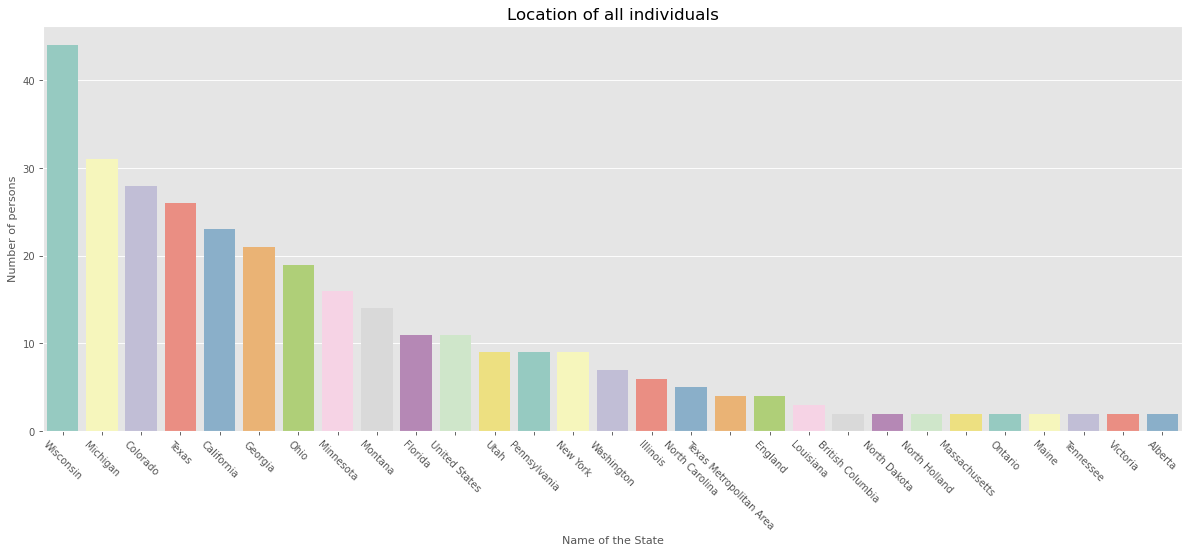

In [19]:
#visualisation of all people's states from dataset
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='state', y='profileid', palette='Set3', data = st.sort_values(by='profileid', ascending=False))
plt.title('Location of all individuals', size='15')
plt.xlabel('Name of the State', size='10')
plt.ylabel('Number of persons', size='10')
plt.yticks(size='9')
plt.xticks(size='9')
plt.tight_layout() 
plt.savefig('slide3.png')
plt.xticks(rotation=-45)
plt.show()

Location of individuals, who purchased event or membership:

In [20]:
#clear dataset from those who did not purchased event or membership
purchased = df[df['result'].str.contains("purchased")==True]
st_clients = purchased.groupby('state')['profileid'].count().reset_index()
#lets check from which state clients
st_clients.sort_values(by='profileid', ascending=False)

,state,profileid
2,Michigan,3
6,Wisconsin,2
0,California,1
1,Georgia,1
3,Minnesota,1
4,Ohio,1
5,Texas,1


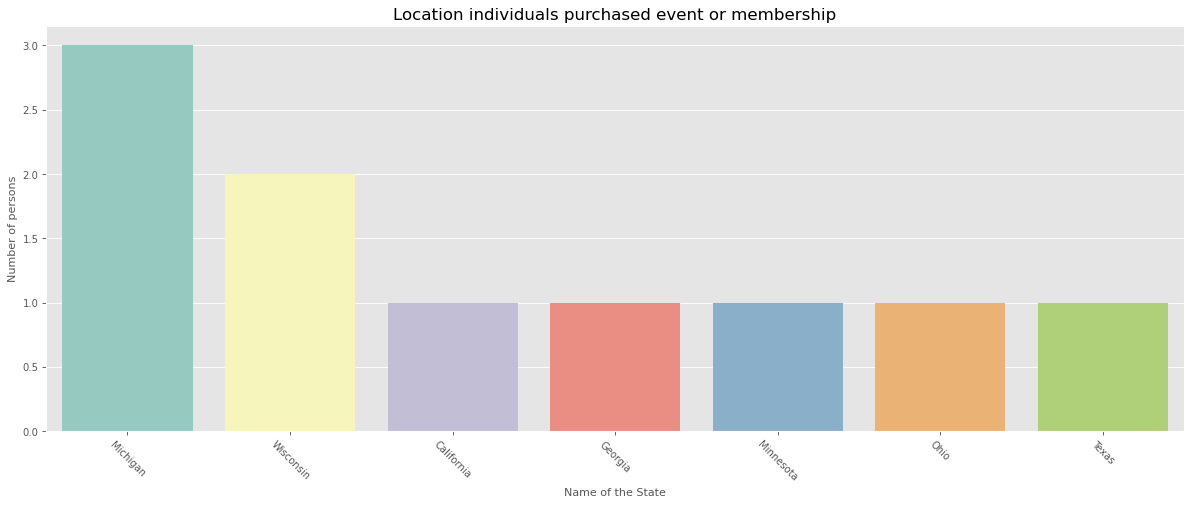

In [21]:
#visualisation only of those who purchased
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='state', y='profileid', palette='Set3', data = st_clients.sort_values(by='profileid', ascending=False))
plt.title('Location individuals purchased event or membership', size='15')
plt.xlabel('Name of the State', size='10')
plt.ylabel('Number of persons', size='10')
plt.yticks(size='9')
plt.xticks(size='9')
plt.tight_layout() 
plt.savefig('slide3.png')
plt.xticks(rotation=-45)
plt.show()

**Conclusion: The most common location of individuals from the dataset are States of the USA, such as Wisconsin, Michigan, Colorado, Texas, California, Georgia. And those who purchased are from the most common locations: Michigan, Wisconsin, California, Georgia, Texas, Ohio. There are no customers from other countries.**

**2.3 Jobtitle** 

In [23]:
#dataframe for visualisation
jobtitle = df.groupby('jobtitle')['profileid'].count().reset_index()
#taking only those rows, where > 1 person of the same job title
jobtitle = jobtitle.query('profileid > 1')

In [24]:
df['jobtitle'].unique()

array(['CEO', 'President and Illustrator', 'Chief Executive Officer',
       'Founder and Principal', 'Founder & CEO', 'Managing Partner',
       'Owner', 'Founder', 'Co-Founder',
       'Chief Strategy & Product Officer',
       'CEO / Co-Founder of Hello Beverages', 'Co-Founder & CTO',
       'Seller Marketing Manager @ Etsy', 'Chief Instigator / Co-Founder',
       'Founder and Chief Executive Officer', 'Founder and CEO',
       'Cofounder & CTO', 'Owner Narrative Shift (fka Blue Heeler Arts)',
       'Counselor of Laws', 'Founder | Systems Engineer',
       'Automation Engineer, Founder and CEO', 'President',
       'Art Director, Designer, Pixel Pusher', 'CEO and President',
       'Chief Operating Officer', 'Director Of Operations',
       'Co-Founder & CEO', 'Audiobook Narrator',
       'Story Teller, Educator & Creative Brand Marketing Guide', 'Host',
       'Account Manager', 'Director Of Engineering',
       'Executive Vice President', 'Owner/Trainer',
       'Customer Servic

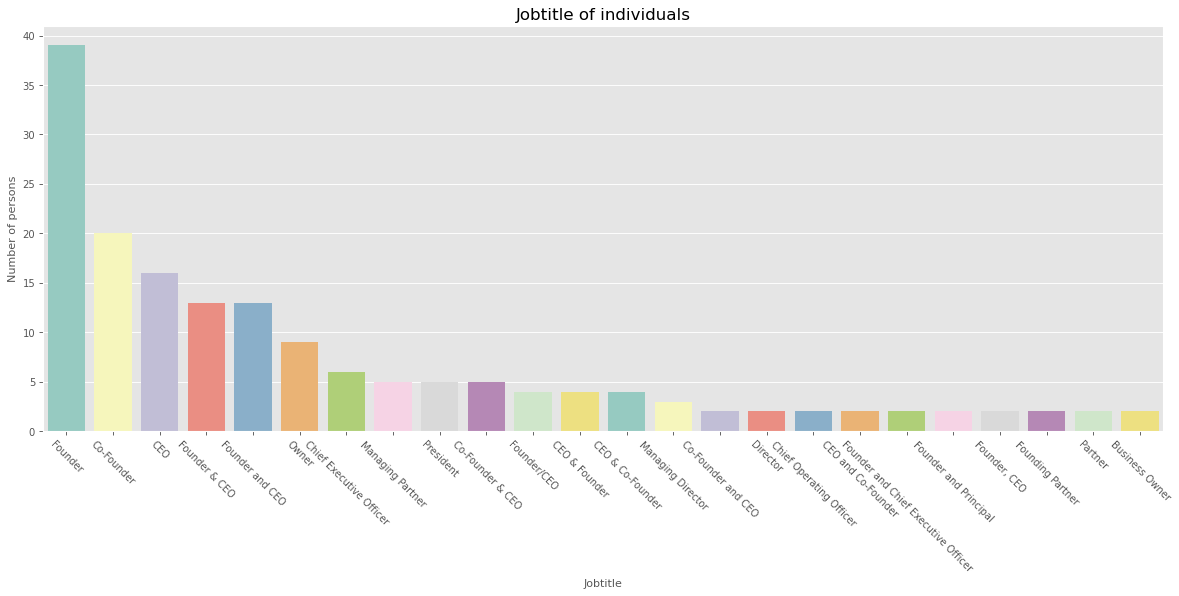

In [25]:
#visualisation of all people's states from dataset
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='jobtitle', y='profileid', palette='Set3', data = jobtitle.sort_values(by='profileid', ascending=False))
plt.title('Jobtitle of individuals', size='15')
plt.xlabel('Jobtitle', size='10')
plt.ylabel('Number of persons', size='10')
plt.yticks(size='9')
plt.xticks(size='9')
plt.tight_layout() 
plt.savefig('slide3.png')
plt.xticks(rotation=-45)
plt.show()

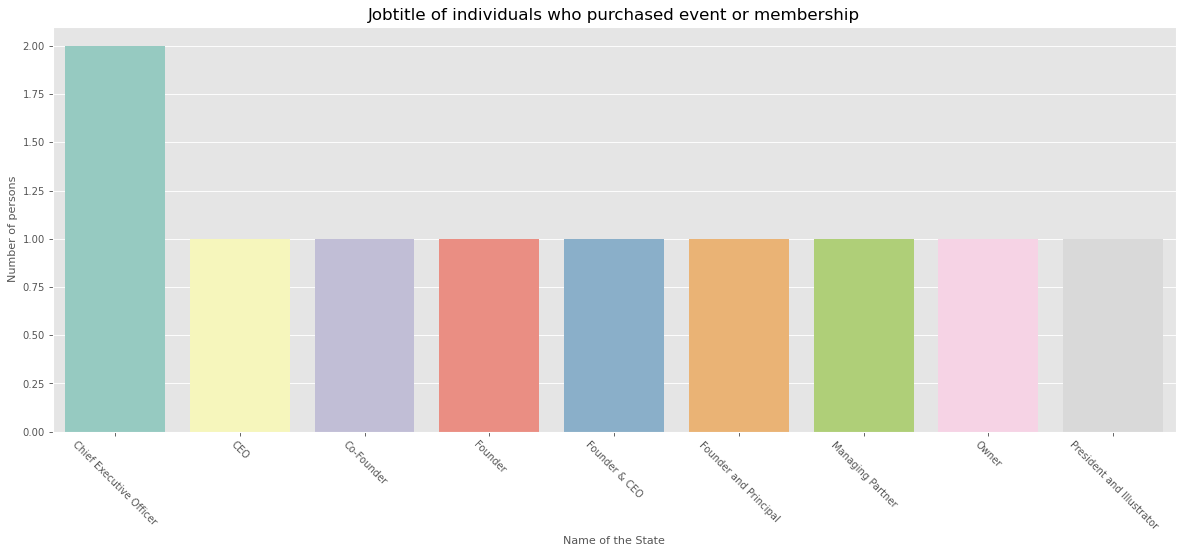

In [27]:
#selecting of those who purchased
jobtitle_purchased = df[df['result'].str.contains("purchased")==True].groupby('jobtitle')['profileid'].count().reset_index()

#visualisation only of those who purchased
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='jobtitle', y='profileid', palette='Set3', data = jobtitle_purchased.sort_values(by='profileid', ascending=False))
plt.title('Jobtitle of individuals who purchased event or membership', size='15')
plt.xlabel('Name of the State', size='10')
plt.ylabel('Number of persons', size='10')
plt.yticks(size='9')
plt.xticks(size='9')
plt.tight_layout() 
plt.savefig('slide3.png')
plt.xticks(rotation=-45)
plt.show()

**Conclusion: The biggest part of the all individuals are founders and top managers (38 indivials are Founders, 20-Co-Founders, 16-CEO, 26 founders and CEO). Those who purchased - 3 CEO, 2 Founders, 1 Founder and CEO, 1 Co-Founder. There are no Accountan Manager, COO, marketing managers, consultants, specialists among those who was interested in the offer. So, it can be said that the target audience is top managers and company owners, their positions are Founder/Co-Founder/CEO/Owner/President/Principal**

**2.4 Education**

In [28]:
#dataframe for visualisation
school = df.groupby('school')['profileid'].count().reset_index()
#taking only those rows, where > 1 person of the same job title
school = school.query('profileid > 1')

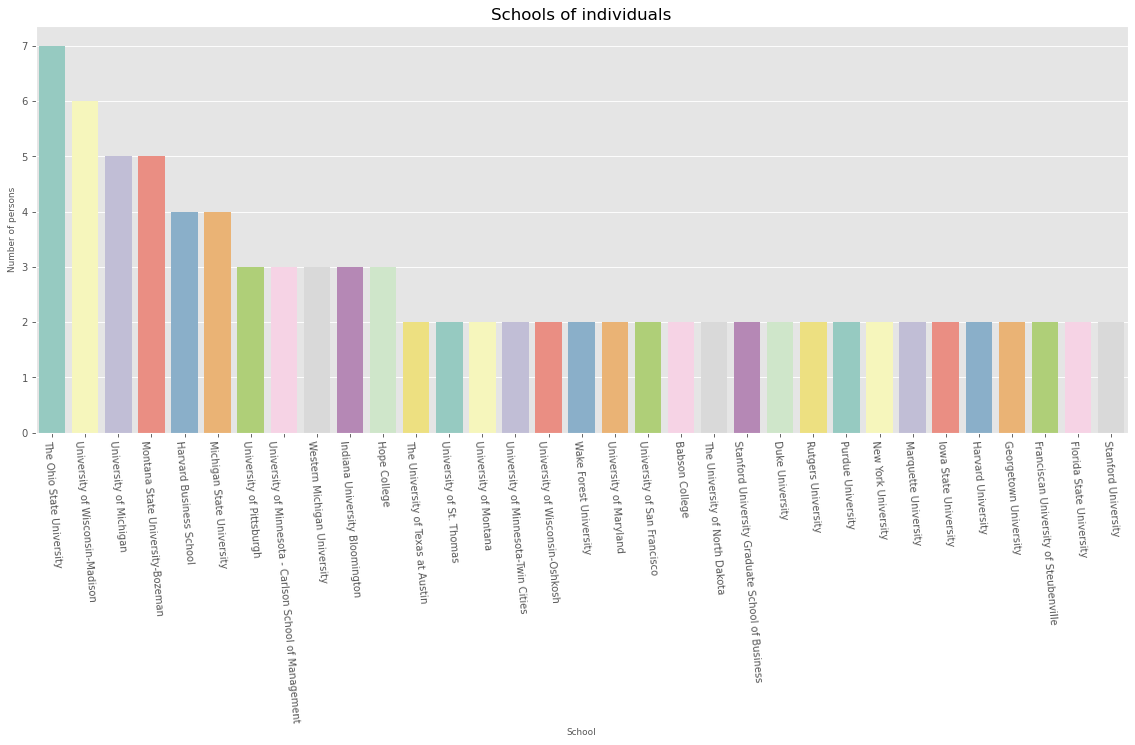

In [30]:
#visualisation of all people's schools from dataset
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='school', y='profileid', palette='Set3', data = school.sort_values(by='profileid', ascending=False))
plt.title('Schools of individuals', size='15')
plt.xlabel('School', size='8')
plt.ylabel('Number of persons', size='8')
plt.yticks(size='9')
plt.xticks(size='9')
plt.tight_layout() 
plt.savefig('slide3.png')
plt.xticks(rotation=-85)
plt.show()

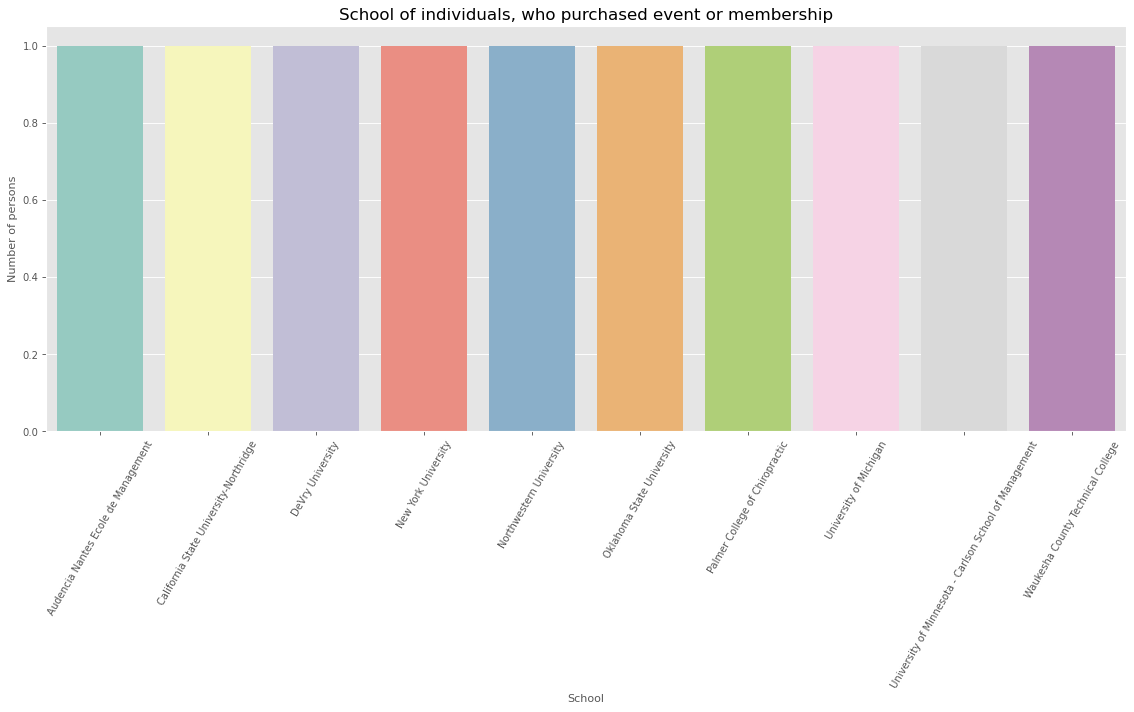

In [32]:
#selecting of those who purchased
school_purchased = df[df['result'].str.contains("purchased")==True].groupby('school')['profileid'].count().reset_index()

#visualisation only of those who purchased
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='school', y='profileid', palette='Set3', data = school_purchased.sort_values(by='profileid', ascending=False))
plt.title('School of individuals, who purchased event or membership', size='15')
plt.xlabel('School', size='10')
plt.ylabel('Number of persons', size='10')
plt.yticks(size='9')
plt.xticks(size='9')
plt.tight_layout() 
plt.savefig('slide3.png')
plt.xticks(rotation=60)
plt.show()

**Conclusion. The school of those who purchased depends on his location. It can not be said that School's name affects on the result, all customers are from different Univirsities. The common feature is that all individuals, who purchased event, or mebership have graduated the University.**

**General Conclusion**

There were analysed the dataset from LinkedIn. The aim of this analysis was to find traits, characteristics, patterns, etc. to indicate a higher probability of a positive/ideal outcome.

There were compared group of individuals who purchased event or membership with other individuals. 

- 1. Number of subscribers. Individuals who has purchased membership or event have from 350 to 2800 subscribers. Median number of "purchased event" is 900, "purchased membership" - 1800. Those who approved to come, but did not purchase have wide range of values. So we can tell that median range of those who has purchased - is from 350 to 2800 subscribers
- 2. Location. The most common location of individuals from the dataset are States of the USA, such as Wisconsin, Michigan, Colorado, Texas, California, Georgia. And those who purchased are from the most common locations: Michigan, Wisconsin, California, Georgia, Texas, Ohio. There are no customers from other countries.
- 3. Position. The biggest part of the all individuals are founders and top managers (38 indivials are Founders, 20-Co-Founders, 16-CEO, 26 founders and CEO). Those who purchased - 3 CEO, 2 Founders, 1 Founder and CEO, 1 Co-Founder. There are no Accountan Manager, COO, marketing managers, consultants, specialists among those who was interested in the offer. So, it can be said that the target audience is top managers and company owners, their positions are Founder/Co-Founder/CEO/Owner/President/Principal
- 4. Education. The biggest part of the all individuals are founders and top managers (38 indivials are Founders, 20-Co-Founders, 16-CEO, 26 founders and CEO). Those who purchased - 3 CEO, 2 Founders, 1 Founder and CEO, 1 Co-Founder. There are no Accountan Manager, COO, marketing managers, consultants, specialists among those who was interested in the offer. So, it can be said that the target audience is top managers and company owners, their positions are Founder/Co-Founder/CEO/Owner/President/Principal

The target audience are Founder/Co-Founder/CEO/Owner/President/Principal, with 350-2800 subscribers, situated in the USA (mostly from Michigan, Wisconsin, California, Georgia, Texas, Ohio). Who has graduated the University. 